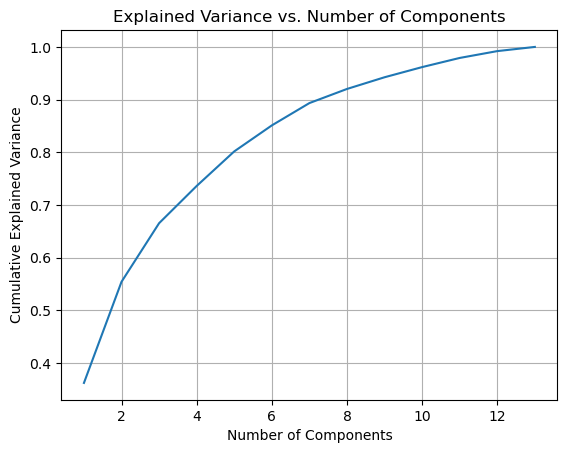

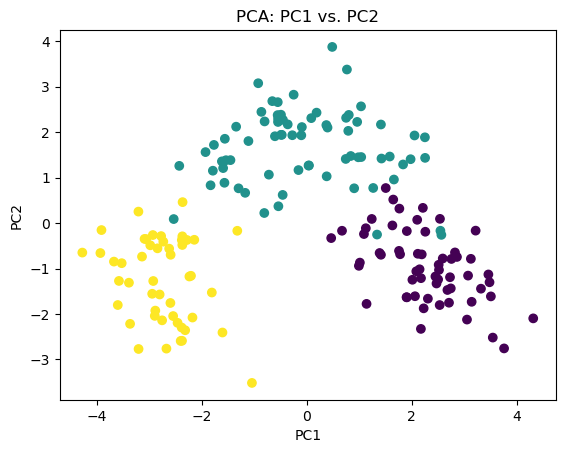

Silhouette Score: 0.28
Calinski-Harabasz Score: 70.94
Davies-Bouldin Score: 1.39


In [1]:
#Que. Objective:

#The objective of this assignment is to implement PCA on a given dataset and analyse the results.

#Instructions:

#Download the wine dataset from the UCI Machine Learning Repository
#(https://archive.ics.uci.edu/ml/datasets/Wine).

#Load the dataset into a Pandas dataframe.
#Split the dataset into features and target variables.
#Perform data preprocessing (e.g., scaling, normalisation, missing value imputation) as necessary.
#Implement PCA on the preprocessed dataset using the scikit-learn library.
#Determine the optimal number of principal components to retain based on the explained variance ratio.
#Visualise the results of PCA using a scatter plot.
#Perform clustering on the PCA-transformed data using K-Means clustering algorithm.
#Interpret the results of PCA and clustering analysis.

#Deliverables:

#Jupyter notebook containing the code for the PCA implementation.
#A report summarising the results of PCA and clustering analysis.
#Scatter plot showing the results of PCA.
#A table showing the performance metrics for the clustering algorithm.

#Additional Information:

#You can use the python programming language.
#You can use any other machine learning libraries or tools as necessary.
#You can use any visualisation libraries or tools as necessary.

#Ans

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
import warnings

# Step 1: Loading the Dataset

data = pd.read_csv('wine.csv', header=None)

# Step 2: Preprocessing the Data

X = data.iloc[:, 1:]  # Exclude the first column containing labels
y = data.iloc[:, 0]   # First column contains labels

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 3: Implementing PCA

n_components = X_scaled.shape[1]
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X_scaled)
explained_variance_ratio = pca.explained_variance_ratio_

# Step 4: Determining Optimal Number of Components

cumulative_variance = np.cumsum(explained_variance_ratio)

plt.plot(range(1, n_components + 1), cumulative_variance)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance vs. Number of Components')
plt.grid(True)
plt.show()

# Step 5: Visualizing the Results of PCA

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA: PC1 vs. PC2')
plt.show()

# Step 6: Performing Clustering with K-Means

warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)

kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
cluster_labels = kmeans.fit_predict(X_pca)

# Step 7: Interpreting the Results

silhouette_score = silhouette_score(X_pca, cluster_labels)
calinski_harabasz_score = calinski_harabasz_score(X_pca, cluster_labels)
davies_bouldin_score = davies_bouldin_score(X_pca, cluster_labels)

print("Silhouette Score: {:.2f}".format(silhouette_score))
print("Calinski-Harabasz Score: {:.2f}".format(calinski_harabasz_score))
print("Davies-Bouldin Score: {:.2f}".format(davies_bouldin_score))